In [1]:
import pandas as pd
import numpy as np

http://192.168.1.17:8502/

In [2]:
df = pd.read_csv(r"C:\Users\HP\Documents\100\web_app\stack-overflow-developer-survey-2021\survey_results_public.csv")

In [3]:
df.head(5)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [4]:
df.columns == 'ConvertedCompYearly'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True])

In [5]:
df = df[["Country","EdLevel","YearsCodePro","Employment","ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly":"Salary"},axis = 1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [6]:
df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [8]:
data = df.copy()

In [9]:
data.isnull().sum()

Country           0
EdLevel          21
YearsCodePro    453
Employment       13
Salary            0
dtype: int64

In [10]:
data.isnull().mean()*100

Country         0.000000
EdLevel         0.044830
YearsCodePro    0.967040
Employment      0.027752
Salary          0.000000
dtype: float64

#### As this has very less percentage of missing values dropping them wont distort the data

In [11]:
data = data.dropna()
data.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [12]:
data["Employment"].describe()

count                  46359
unique                     5
top       Employed full-time
freq                   40211
Name: Employment, dtype: object

In [13]:
data["Employment"].value_counts()


Employed full-time                                      40211
Independent contractor, freelancer, or self-employed     4712
Employed part-time                                       1389
I prefer not to say                                        31
Retired                                                    16
Name: Employment, dtype: int64

In [14]:
data = data.loc[(data.Employment == "Employed full-time") + (data.Employment == "Independent contractor, freelancer, or self-employed")]

In [15]:
print(dt.shape)
40211+4712

NameError: name 'dt' is not defined

In [16]:
data.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Employed full-time,46135.0


<AxesSubplot:>

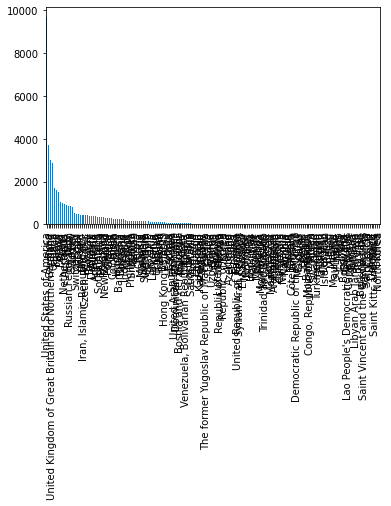

In [17]:
data["Country"].value_counts().plot.bar()

In [18]:
def req_categories(categories,cutoff):
    cat_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            cat_map[categories.index[i]] = categories.index[i]
        else:
            cat_map[categories.index[i]] = 'Other'
    return cat_map

In [21]:
Country_map

{'United States of America': 'United States of America',
 'India': 'India',
 'Germany': 'Germany',
 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom of Great Britain and Northern Ireland',
 'Canada': 'Canada',
 'France': 'France',
 'Brazil': 'Brazil',
 'Poland': 'Poland',
 'Spain': 'Spain',
 'Netherlands': 'Netherlands',
 'Australia': 'Australia',
 'Italy': 'Italy',
 'Russian Federation': 'Russian Federation',
 'Sweden': 'Sweden',
 'Turkey': 'Turkey',
 'Switzerland': 'Switzerland',
 'Israel': 'Israel',
 'Ukraine': 'Ukraine',
 'Mexico': 'Mexico',
 'Iran, Islamic Republic of...': 'Iran, Islamic Republic of...',
 'Czech Republic': 'Czech Republic',
 'Norway': 'Norway',
 'Belgium': 'Belgium',
 'Denmark': 'Other',
 'Austria': 'Other',
 'Argentina': 'Other',
 'Finland': 'Other',
 'South Africa': 'Other',
 'Pakistan': 'Other',
 'Romania': 'Other',
 'New Zealand': 'Other',
 'Portugal': 'Other',
 'Greece': 'Other',
 'China': 'Other',
 'Colombia': 'Other',
 'Japan': 'Other

In [20]:
Country_map = req_categories(data.Country.value_counts(),400)
data["Country"] = data["Country"].map(Country_map)
data.Country.value_counts()

Other                                                   10385
United States of America                                 9677
India                                                    3694
Germany                                                  3014
United Kingdom of Great Britain and Northern Ireland     2869
Canada                                                   1700
France                                                   1590
Brazil                                                   1515
Poland                                                   1046
Spain                                                     997
Netherlands                                               959
Australia                                                 912
Italy                                                     882
Russian Federation                                        840
Sweden                                                    806
Turkey                                                    517
Switzerl

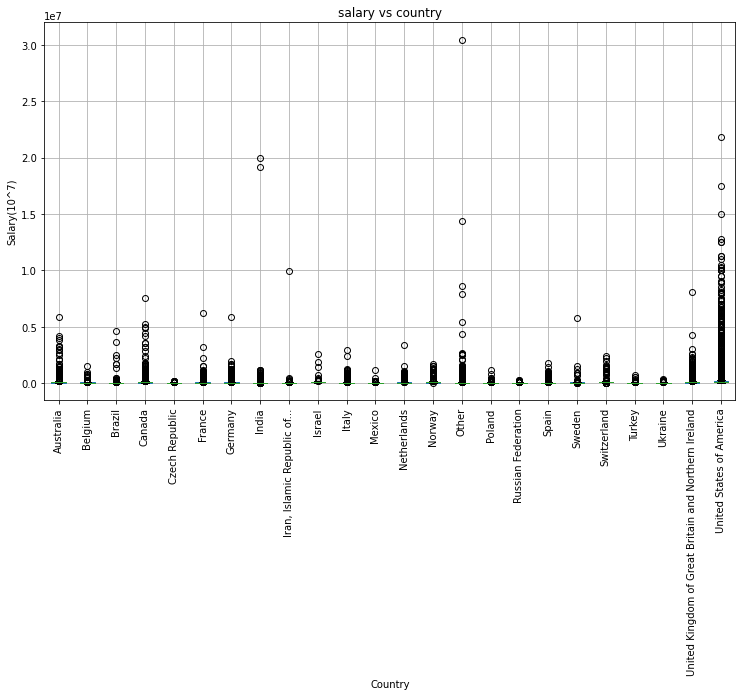

In [22]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize= (12,7))
data.boxplot('Salary','Country',ax=ax)
plt.suptitle('')
plt.title('salary vs country')
plt.ylabel('Salary(10^7)')
plt.xticks(rotation = 90)
plt.show()

In [23]:
data = data[data["Salary"] <= 500000]
data = data[data["Salary"] >= 10000]
data = data[data["Country"] != 'Other']

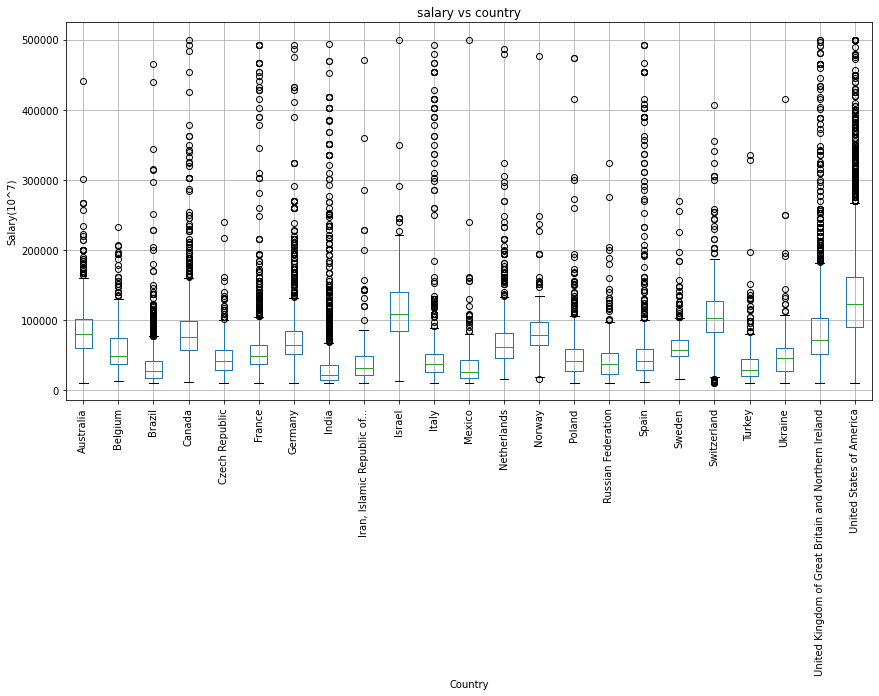

In [24]:
fig,ax = plt.subplots(1,1,figsize= (14,7))
data.boxplot('Salary','Country',ax=ax)
plt.suptitle('')
plt.title('salary vs country')
plt.ylabel('Salary(10^7)')
plt.xticks(rotation = 90)
plt.show()

In [25]:
data["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '15', '3', '12', '8', '17', '1', '14', '26', '25', '34', '11',
       '24', '22', '13', '9', '7', '31', '39', '20', '27', '23', '35',
       '30', '19', '33', 'More than 50 years', '37', '43', '40', '29',
       '38', '32', '42', '28', '46', '36', '44', '47', '45', '41', '50',
       '49', '48'], dtype=object)

In [26]:
def clean_exp(exp):
    if exp == "More than 50 years":
        return 50
    if exp == "Less than 1 year":
        return 0.5
    return float(exp)

In [27]:
data['YearsCodePro'] = data["YearsCodePro"].apply(clean_exp)

In [28]:
data['Salary']

9         51552.0
11        46482.0
12        77290.0
16        17748.0
17        46135.0
           ...   
83432     80169.0
83433     18326.0
83434    160500.0
83436     90000.0
83438     21168.0
Name: Salary, Length: 31472, dtype: float64

In [29]:
data["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [30]:
def clean_education(degree):
    if 'Bachelor’s degree' in degree:
        return 'Bachelor’s degree'
    if 'Master’s degree' in degree:
        return 'Master’s degree'
    if 'Professional degree' in degree or 'Other doctoral degree' in degree:
        return 'Post_grad'
    return 'Less than a Bachelors'

data["EdLevel"] = data["EdLevel"].apply(clean_education)

In [31]:
data["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post_grad'], dtype=object)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31472 entries, 9 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31472 non-null  object 
 1   EdLevel       31472 non-null  object 
 2   YearsCodePro  31472 non-null  float64
 3   Employment    31472 non-null  object 
 4   Salary        31472 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["EdLevel"]  = le.fit_transform(data["EdLevel"])
data["EdLevel"].unique()

array([2, 0, 1, 3])

In [34]:
le_c = LabelEncoder()
data["Country"] = le.fit_transform(data["Country"])
data["Country"].unique()

array([17, 16,  6, 19,  3,  5, 18, 21, 15,  9, 20, 22,  2, 10, 12, 14,  0,
        1,  8,  7, 13,  4, 11])

In [35]:
data = data.drop('Employment',axis = 1)

In [36]:
X = data.drop('Salary',axis =1)
y = data["Salary"]

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.pipeline import Pipeline

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [39]:
y1 = y_train.values
y_1= y1.reshape(-1,1)

In [40]:
y2 = y_test.values
y_2 = y2.reshape(-1,1)

In [41]:
y1.ndim,y2.ndim

(1, 1)

In [ ]:
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', RandomForestRegressor(random_state=0))])
# fit pipeline
pipeline.fit(x_train, y1)
# make predictions
yhat = pipeline.predict(x_test)

In [42]:
target_scaler = MinMaxScaler()
target_scaler.fit(y_1)

MinMaxScaler()

In [43]:
train_y = target_scaler.transform(y_1)
test_y = target_scaler.transform(y_2)

### Linear reg

In [44]:
lr = LinearRegression()
lr.fit(x_train,train_y)

LinearRegression()

In [45]:
yt = lr.predict(x_test)
yt = yt.reshape(-1,1)
yt = target_scaler.inverse_transform(yt)

In [46]:
error2 = np.sqrt(mean_squared_error(y_test,yt))

In [47]:
print(error2)

57582.95751538297


### Random forest

In [48]:
rf_1 = RandomForestRegressor(random_state=0)
rf_1.fit(x_train,train_y)

C:\Users\HP\AppData\Local\Temp/ipykernel_4936/3344373905.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_1.fit(x_train,train_y)


RandomForestRegressor(random_state=0)

In [49]:
# invert transform on predictions
yhat = rf_1.predict(x_test)
yhat = yhat.reshape(-1,1)
yhat = target_scaler.inverse_transform(yhat)

In [50]:
error1 = np.sqrt(mean_squared_error(y_test,yhat))

In [51]:
print(error1)

52439.795767588934


In [52]:
print("${:,.02f}".format(error1))

$52,439.80


In [53]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(x_train,y1)

DecisionTreeRegressor(random_state=0)


### error has decreased compared to linear regression

In [54]:
pred_dt = dt_reg.predict(x_test)

In [55]:
error_2 = np.sqrt(mean_squared_error(y2,pred_dt))

In [56]:
print("${:,.02f}".format(error_2))

$53,035.57


In [57]:
from sklearn.model_selection import GridSearchCV
max_depth = [None,2,4,6,8,10]
parameters = {'max_depth':max_depth}
regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error')
gs.fit(x_train,y1)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10]},
             scoring='neg_mean_squared_error')

In [58]:
regressor = gs.best_estimator_

In [59]:
regressor.fit(x_train,y1)
y_pred = regressor.predict(x_test)
error3 = np.sqrt(mean_squared_error(y2,y_pred))

In [60]:
print("${:,.02f}".format(error3))

$51,775.63


In [61]:
x_train

,Country,EdLevel,YearsCodePro
13890,21,0,20.0
5471,22,2,5.0
35900,22,3,6.0
4481,7,0,7.0
50507,22,0,28.0
...,...,...,...
78283,7,0,5.0
13586,1,0,10.0
2101,21,2,5.0
41953,10,0,12.0


In [62]:
p_array = np.array([["United States","Master's degree",15]])
p_array

array([['United States', "Master's degree", '15']], dtype='<U15')

In [63]:
le_c = LabelEncoder()
p_array[:,0] = le_c.fit_transform(p_array[:,0])
p_array[:,1] = le_c.fit_transform(p_array[:,1])
p_array = p_array.astype(float)

In [64]:
p_array

array([[ 0.,  0., 15.]])

In [65]:
ypredict = regressor.predict(p_array)
ypredict

c:\users\hp\documents\100\ml_app\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([104582.85436893])

In [66]:
import pickle

In [67]:
final_data = {"model" : regressor,"le_country":le_c,"le_education":le}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(final_data,file)

In [68]:
with open('saved_steps.pkl','rb') as file:
    final_data = pickle.load(file)

In [69]:
regressor_load = final_data["model"]
le_country = final_data["le_country"]
le_education = final_data["le_education"]

In [70]:
ypredict = regressor_load.predict(p_array)
ypredict

c:\users\hp\documents\100\ml_app\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([104582.85436893])